In [10]:
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

import timeit

import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

from collections import Counter

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("russian")
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import time

import pymorphy2
morph = pymorphy2.MorphAnalyzer()

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

replace_city_name = 'название_город' # название для замены

<ipython-input-10-ed7095f1f3a8>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook
C:\Users\Ирик\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ирик\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ирик\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ирик\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stopwords = set(nltk_stopwords.words('russian'))
my_stopwrods = ['а', 'будем', 'будет', 'будете', 'будешь', 'буду', 'будут', 'будучи', 'будь', 'будьте', 'бы', 'был', 'была', 'были', 'было', 'быть', 'в', 'вам', 'вами', 'вас', 'весь', 'во', 'вот', 'все', 'всё', 'всего', 'всей', 'всем', 'всём', 'всеми', 'всему', 'всех', 'всею', 'всея', 'всю', 'вся', 'вы', 'да', 'для', 'до', 'его', 'едим', 'едят', 'ее', 'её', 'ей', 'ел', 'ела', 'ем', 'ему', 'емъ', 'если', 'ест', 'есть', 'ешь', 'еще', 'ещё', 'ею', 'же', 'за', 'и', 'из', 'или', 'им', 'ими', 'имъ', 'их', 'к', 'как', 'кем', 'ко', 'когда', 'кого', 'ком', 'кому', 'комья', 'которая', 'которого', 'которое', 'которой', 'котором', 'которому', 'которою', 'которую', 'которые', 'который', 'которым', 'которыми', 'которых', 'кто', 'меня', 'мне', 'мной', 'мною', 'мог', 'моги', 'могите', 'могла', 'могли', 'могло', 'могу', 'могут', 'мое', 'моё', 'моего', 'моей', 'моем', 'моём', 'моему', 'моею', 'можем', 'может', 'можете', 'можешь', 'мои', 'мой', 'моим', 'моими', 'моих', 'мочь', 'мою', 'моя', 'мы', 'на', 'нам', 'нами', 'нас', 'наса', 'наш', 'наша', 'наше', 'нашего', 'нашей', 'нашем', 'нашему', 'нашею', 'наши', 'нашим', 'нашими', 'наших', 'нашу', 'не', 'него', 'нее', 'неё', 'ней', 'нем', 'нём', 'нему', 'нет', 'нею', 'ним', 'ними', 'них', 'но', 'о', 'об', 'один', 'одна', 'одни', 'одним', 'одними', 'одних', 'одно', 'одного', 'одной', 'одном', 'одному', 'одною', 'одну', 'он', 'она', 'оне', 'они', 'оно', 'от', 'по', 'при', 'с', 'сам', 'сама', 'сами', 'самим', 'самими', 'самих', 'само', 'самого', 'самом', 'самому', 'саму', 'свое', 'своё', 'своего', 'своей', 'своем', 'своём', 'своему', 'своею', 'свои', 'свой', 'своим', 'своими', 'своих', 'свою', 'своя', 'себе', 'себя', 'собой', 'собою', 'та', 'так', 'такая', 'такие', 'таким', 'такими', 'таких', 'такого', 'такое', 'такой', 'таком', 'такому', 'такою', 'такую', 'те', 'тебе', 'тебя', 'тем', 'теми', 'тех', 'то', 'тобой', 'тобою', 'того', 'той', 'только', 'том', 'томах', 'тому', 'тот', 'тою', 'ту', 'ты', 'у', 'уже', 'чего', 'чем', 'чём', 'чему', 'что', 'чтобы', 'эта', 'эти', 'этим', 'этими', 'этих', 'это', 'этого', 'этой', 'этом', 'этому', 'этот', 'этою', 'эту', 'я']
all_stopwords = set(my_stopwrods).union(stopwords)

In [3]:
features_list = [] # список фич

# Тесты функций

In [4]:
sss = """
<!DOCTYPE html>
<html>
    <head>
        <title>Header</title>
        <meta charset="utf-8">                   
    </head>
        
    <body>
        <h2>Operating systems</h2>
        
        <ul id="mylist" style="width:150px">
            <li>Solaris</li>
            <li>FreeBSD</li>
            <li>Debian</li>                      
            <li>NetBSD</li>           
            <li>Windows</li>         
        </ul>
        
        <p>
          FreeBSD is an advanced computer operating system used to 
          power modern servers, desktops, and embedded platforms.
        </p>
                
        <p>
          Debian is a Unix-like computer operating system that is 
          composed entirely of free software.
        </p>        
        <img src="asd" alt="">
    </body>    
</html>
"""
sss1 = """
<!DOCTYPE html>
<html>
    <head>
        <title>Header</title>
        <meta charset="utf-8">                   
    </head>
        
    <body>
        <h2>Operating systems</h2>
        
        <ul id="mylist" style="width:150px">
            <li>Solaris</li>
            <li>FreeBSD</li>
            <li>Debian</li>                      
            <li>NetBSD</li>           
            <li>Windows</li>         
        </ul>
        <img src="asd">
        <p>
          FreeBSD is an advanced computer operating system used to 
          power modern servers, desktops, and embedded platforms.
        </p>
    </body>    
</html>
"""
sss2 = """
<!DOCTYPE html>
<html>
    <head>
        <title>Header</title>
        <meta charset="utf-8">                   
    </head>
        
    <body>
        <h1>Operating systems</h1>
        <h1>Operating systems 123</h1>
        
        <ul id="mylist" style="width:150px">
            <li>Solaris</li>
            <li>FreeBSD</li>
            <li>Debian</li>                      
            <li>NetBSD</li>           
            <li>Windows</li>         
        </ul>
        <img src="asd" alt="some">
    </body>    
</html>
"""
                                
ss_d = {
    'text': ['Тут вы могли, бы бетон. купить бетон купить хороший бетон', 'Купить бетон недорого'],
    'qu': ['Купить бетон в НАЗВАНИЕ_ГОРОДА', 'Купить бетон'] 
}
df_ss = pd.DataFrame(ss_d)

In [61]:
tokenizer = RegexpTokenizer(r'\w+')

def getDomain(url):
    url_splited = url.split('//')
    if len(url_splited) == 1:
        domain = url_splited[0]
    else:
        domain = url_splited[1]
    domain = domain.split('/')
    domain = domain[0]
    return domain

# Количество вхождений и плотность запроса
def getDensityApply(row, replace_city=True):
    txt = row['text'].lower()
    qu = row['qu'].lower()
    if replace_city:
        # обрезаем вхождение города
        city_name = replace_city_name
        qu = qu.replace(' в ' + city_name, '')
        qu = qu.replace(' ' + city_name, '')
    # разбиваем текст
    word_list = [w for w in tokenizer.tokenize(txt) if not w in all_stopwords]
    word_cnt = len(word_list)
    #print(word_list)
    #lemms = [morph.parse(w)[0].normal_form for w in word_list]
    cnt_qu = len(re.findall(rf'{qu}', txt))
    return cnt_qu, cnt_qu/word_cnt

def getWaterContent(row):
    #all_stopwords
    """
    Количество вхождение стоп слов в общее количество слов
    """
    word_list = tokenizer.tokenize(row['text_content'])
    cnt_stopwords = sum(map(word_list.count, all_stopwords)) # количество вхождений стопслов в контент
    return cnt_stopwords/row['words_count']

def getSpamity(val):
    # получаем список слов и исключаем стоп слова
    word_list = [w for w in tokenizer.tokenize(val) if not w in all_stopwords] 
    cnt_words = Counter(word_list)
    max_freq = cnt_words.most_common(1)[0][1]
    return max_freq/len(word_list), max_freq

#stopwords = set(nltk_stopwords.words('russian'))


df_ss['cnt_qu'], df_ss['dens_qu'] = zip(*df_ss.apply(getDensityApply, replace_city=True, axis=1))
df_ss['spamity'], df_ss['max_word_freq'] = zip(*df_ss['text'].apply(getSpamity))
#getTfIdf('.'.join(ss_d['text']), ss_d['qu'][1])
df_ss

Тут вы могли, бы бетон. купить бетон купить хороший бетон.Купить бетон недорого
Купить бетон
  (0, 4)	0.6198053799406072
  (0, 3)	0.6198053799406072
  (0, 0)	0.48133416873660545


,text,qu,cnt_qu,dens_qu,spamity,max_word_freq
0,"Тут вы могли, бы бетон. купить бетон купить хо...",Купить бетон в НАЗВАНИЕ_ГОРОДА,0,0.000000,0.428571,3
1,Купить бетон недорого,Купить бетон,1,0.333333,0.333333,1


# Работаем с основным csv

In [6]:
"""
def getContent(url):
    try:
        return df[df['url'] == url]['content'].values[0]
    except:
        return NaN
"""

In [7]:
df_ws = pd.read_csv('ws.csv', names=['q', 'freq'], sep=';')
df_ws.head()

,q,freq
0,керамзитобетонные блоки в Новосибирске,98
1,керамзитоблоки Новосибирск,23
2,фбс Новосибирск,278
3,бетон с доставкой Новосибирск,373
4,керамзитобетонные блоки Новосибирск,98


In [8]:
df_q = pd.read_csv('parse_q.csv', sep=';', names=['query_results_count', 'search_query', 'lr'])
df_q['freq'] = df_q['search_query'].apply(lambda val: df_ws[df_ws['q'] == val].iloc[0]['freq'])
df_q.head()

,query_results_count,search_query,lr,freq
0,Нашлось 5 млн результатов,керамзитобетонные блоки в Новосибирске,65,98
1,Нашлось 3 млн результатов,керамзитоблоки Новосибирск,65,23
2,Нашлось 3 млн результатов,фбс Новосибирск,65,278
3,Нашлось 7 млн результатов,бетон с доставкой Новосибирск,65,373
4,Нашлось 4 млн результатов,керамзитобетонные блоки Новосибирск,65,98


In [9]:
df_cities = pd.read_csv('../cities.csv', encoding='UTF-8', sep=';')
df_cities.head()

,city,city2
0,Новосибирск,Новосибирске
1,Екатеринбург,Екатеринбурге
2,Казань,Казани
3,Челябинск,Челябинске
4,Самара,Самаре


In [10]:
df = pd.read_csv('df_clear.csv', sep=';')
print(df.shape) # удаляем nan
print('Удаляем nan')
df.dropna(inplace=True)
print(df.shape)
df.head()

(12922, 4)
Удаляем nan
(12922, 4)


,url,domain,content,size_content
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072


In [11]:
df_sites = pd.read_csv('parse_with_q.csv', sep=';')
print('Количество урлов с позицией на первой странице поиска, не рекламные', df_sites[(df_sites['page'] == 0) & ((df_sites['is_reklama'] != '1') & (df_sites['is_ya_url'] != '1')) ].shape)
df_sites.head()

Количество урлов с позицией на первой странице поиска, не рекламные (7446, 8)


,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,query
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске


In [12]:
urls = df['url'].to_list()
df_sites = df_sites[df_sites['url'].isin(urls)]
df_sites.columns = ['link_text', 'url', 'page', 'real_pos', 'pos', 'is_reklama','is_ya_url', 'search_query']
print(df_sites.shape)
df_sites.head()

(31074, 8)


,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске


<AxesSubplot:>

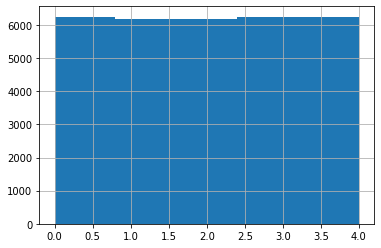

In [13]:
df_sites['page'].hist(bins=5)

# Заменим города

In [14]:
%%time
all_cities = df_cities['city2'].to_list() + df_cities['city'].to_list() # список городов в Им.падеже в конце
def replaceCityQ(val):
    val = val.lower()
    
    for city in all_cities:
        city = city.lower()
        if city in val:
            val = re.sub(r''+city, r''+replace_city_name,val)
            break
    else:
        print(val)
    val = ' '.join([morph.parse(w)[0].normal_form for w in tokenizer.tokenize(val)])
    return val
df_sites['search_query_n'] = df_sites['search_query'].apply(replaceCityQ)
df_q['search_query_n'] = df_q['search_query'].apply(replaceCityQ)

df_sites.head()

Wall time: 18.9 s


,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query,search_query_n
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город


In [15]:
print(df_sites['search_query_n'].value_counts().shape)
df_sites['search_query_n'].value_counts().sort_index()

(13,)


бетон с доставка название_город                   2392
керамзитный блок название_город                   2426
керамзитобетонный блок в название_город           2383
керамзитобетонный блок название_город             2387
керамзитоблок название_город                      2386
купить бетон название_город                       2442
купить бетон с доставка название_город            2355
купить керамзитобетонный блок в название_город    2394
купить керамзитоблок название_город               2388
купить плита перекрытие название_город            2339
купить фбс название_город                         2339
плита перекрытие название_город                   2444
фбс название_город                                2399
Name: search_query_n, dtype: int64

In [16]:
print(df_q['search_query_n'].value_counts().shape)
df_q['search_query_n'].value_counts().sort_index()

(13,)


бетон с доставка название_город                   50
керамзитный блок название_город                   50
керамзитобетонный блок в название_город           50
керамзитобетонный блок название_город             50
керамзитоблок название_город                      50
купить бетон название_город                       50
купить бетон с доставка название_город            50
купить керамзитобетонный блок в название_город    50
купить керамзитоблок название_город               50
купить плита перекрытие название_город            50
купить фбс название_город                         50
плита перекрытие название_город                   50
фбс название_город                                50
Name: search_query_n, dtype: int64

In [17]:
%%time
def replaceCityName(row):
    val = row['content']
    """
    val = val.replace('</p>', '.</p>')
    val = val.replace('</div>', '.</div>')
    val = val.replace('</ul>', '.</ul>')
    """
    #val = re.sub(r'(\<\/div\>|\<\/p\>|\<\/ul\>)', r'.\1', val)
    try:
        for city in all_cities:
            val = val.lower().replace(city.lower(), replace_city_name)
    except:
        print(row['url'])
    return val
df['content'] = df.apply(replaceCityName, axis=1)
df.iloc[2]['content']

Wall time: 35min 10s


'<html class="" lang="ru"><head><script async="" src="https://www.googleadservices.com/pagead/conversion_async.js?_=1613628048989"></script><title>керамзитобетонные блоки в название_город - сравнить цены и купить выгодно</title><meta content="широкий выбор керамзитных блоков всех видов и размеров в название_город ★ подобрать по параметрам, сравнить цены и купить из 21 предложение на портале пульс цен ➤" name="description"><meta content="блоки строительные керамзитобетонные, блоки строительные керамзитобетонные в название_город" name="keywords"><meta content="ie=edge" http-equiv="x-ua-compatible"><meta content="text/html; charset=utf-8" http-equiv="content-type"><script type="text/javascript" id="supportscript" charset="utf-8" async="" src="//me-talk.ru/support/support.js?h=9e71060b780fc267cbbfff6f8dec56ba"></script><script async="" src="https://mc.yandex.ru/metrika/tag.js"></script><script async="" src="//www.googletagmanager.com/gtm.js?id=gtm-zv5s"></script><script src="https://js-age

# добавим столбцы меты
- title
- keywords
- description

In [18]:
def getMeta(val):
    soup = BeautifulSoup(val, 'lxml')
    #q = ' '.join([morph.parse(w)[0].normal_form for w in q.split()])
    try:
        word_list = nltk.word_tokenize(soup.head.title.text.replace('\xa0', ' '))
        title = ' '.join([morph.parse(w)[0].normal_form for w in word_list])
    except:
        title = ''
        
    try:
        word_list = nltk.word_tokenize(soup.head.find_all(attrs={"name" : "description"})[0]['content'].replace('\xa0', ' '))
        descr = ' '.join([morph.parse(w)[0].normal_form for w in word_list])
    except:
        descr = ''
    try:
        word_list = nltk.word_tokenize(soup.head.find_all(attrs={"name" : "keywords"})[0]['content'].replace('\xa0', ' '))
        kw = ' '.join([morph.parse(w)[0].normal_form for w in word_list])
    except:
        kw = ''
    return title.lower(), descr.lower(), kw.lower(), len(title), len(descr), len(kw)

def getLenWords(val):
    return len(val.split(' '))

def getLenKeyWords(val):
    cnt_semi = val.count(',')
    return cnt_semi + ((cnt_semi > 0) * 1) or (len(val) > 0) * 1

# проверить word_list, split(' ')+re.sub(\s+, ' '), val.count(' ') 
print(getLenKeyWords('asd'))
print(getLenKeyWords('asd,asd'))
print(getLenKeyWords('asd,asd,asd'))
print(getLenKeyWords(''))

1
2
3
0


In [19]:
%%time
df['meta_title'], df['meta_descr'], df['meta_kw'], df['len_mt'], df['len_md'], df['len_kw'] = zip(*df['content'].apply(getMeta))

df['len_w_mt'], df['len_w_md'], df['len_w_kw'] = df['meta_title'].apply(getLenWords), df['meta_descr'].apply(getLenWords), df['meta_kw'].apply(getLenKeyWords)

Wall time: 9min 53s


Сохраним фичи:

In [20]:
features_list = features_list + ['len_mt', 'len_md', 'len_kw', 'len_w_mt', 'len_w_md', 'len_w_kw'] 
features_list

['len_mt', 'len_md', 'len_kw', 'len_w_mt', 'len_w_md', 'len_w_kw']

In [21]:
df.head()

,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,12,24,0
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,12,25,10
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,10,27,2
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,8,15,5
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,18,59,0


# Получем текст 

soupt.text - слипает ссылки, get_text(separator=" ", strip=True) - nice

In [22]:
%%time
global troubles_url
troubles_url = []
def getTextContent(row):
    global troubles_url
    val = row['content']
    soup = BeautifulSoup(val, 'lxml')
    try:
        return soup.body.get_text(separator=" ", strip=True)
    except:
        troubles_url.append(row['url'])
        return ''
df['text_content'] = df.apply(getTextContent, axis=1)
df.head()

Wall time: 8min 30s


,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,text_content
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,12,24,0,москва абакан александров альметьевск анапа ар...
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,12,25,10,ооо «кора-строй» завод по производству строите...
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,10,27,2,во всех товарах товары и услуги в каталоге ком...
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,8,15,5,пкф «торгтех трейд название_город» название_го...
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,18,59,0,для бизнеса магазины помощь вход и регистрация...


Посчитаем количество слов на странице

In [23]:
%%time
def getWordsCount(text):
    word_list = tokenizer.tokenize(text) # с стоп-словами
    word_list_sw = [w for w in word_list if not w in all_stopwords] # без стоп-слов
    return len(word_list), len(word_list_sw)
df['words_count'], df['words_count_sw'] = zip(*df['text_content'].apply(getWordsCount))
df.head()

Wall time: 5.57 s


,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,text_content,words_count,words_count_sw
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,12,24,0,москва абакан александров альметьевск анапа ар...,1492,1136
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,12,25,10,ооо «кора-строй» завод по производству строите...,1233,1010
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,10,27,2,во всех товарах товары и услуги в каталоге ком...,1517,1340
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,8,15,5,пкф «торгтех трейд название_город» название_го...,1040,984
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,18,59,0,для бизнеса магазины помощь вход и регистрация...,1655,1484


In [24]:
features_list = features_list + ['words_count', 'words_count_sw']
features_list

['len_mt',
 'len_md',
 'len_kw',
 'len_w_mt',
 'len_w_md',
 'len_w_kw',
 'words_count',
 'words_count_sw']

очистим с маленьким значением слов

In [25]:
#df[(df['words_count'] < 1000) & (df['domain'] != 'www.Avito.ru')]['words_count'].hist(bins=50)

In [26]:
print(df.shape)
df = df[~df['text_content'].str.contains('ваш браузер не поддерживаться')]
print(df.shape)

(12922, 16)
(12922, 16)


Добавим пустые тексты в исключение

In [27]:
troubles_url = troubles_url + df[df['words_count'] < 300]['url'].to_list()

## Собрали урлы с отсуствущим контентом или малым количеством

In [28]:
print(len(troubles_url))
troubles_url

673


['https://novosibirsk.yamart.ru/bloki-keramzitobetonnye-36388/',
 'https://www.ds54.ru/goods/keramzitobloki/',
 'https://gostbeton.ru/beton/fbs.php',
 'https://novosibirsk.yamart.ru/bloki-keramzitnye-36392/',
 'http://gk-ask54.ru/katalog/zhbi/plity-perekrytiya',
 'https://nsk.vimall.ru/stroitelnye-bloki-keramzitobetonnye',
 'http://zhbi-invest.ru/products/fbs',
 'https://ekaterinburg.yamart.ru/bloki-keramzitobetonnye-36388/',
 'https://ekaterinburg.yamart.ru/bloki-keramzitnye-36392/',
 'https://xn----9sbhjl2bvi.xn--p1ai/catalog/keramzitobetonnyie-bloki',
 'http://www.xn----7sbenblhdkhkgpsu0b8k.xn--p1ai/',
 'https://kazan.yamart.ru/bloki-keramzitobetonnye-36388/',
 'https://www.instagram.com/fbs_bloki/',
 'http://jbikazan.ru/plity-perekritiya.html',
 'http://plitajbi.ru/',
 'https://www.stroytreid-nk.ru/catalog/k-7414886-kerazitobetonnyye_bloki',
 'https://cementkaz.ru/tovary/jbi/fbs-24.5.6/',
 'https://cementkaz.ru/tovary/jbi/fbs-24.5.6/',
 'https://chelyabinsk.yamart.ru/bloki-keramzit

исключим их из данных

(29654, 9)
Wall time: 33 ms


<AxesSubplot:>

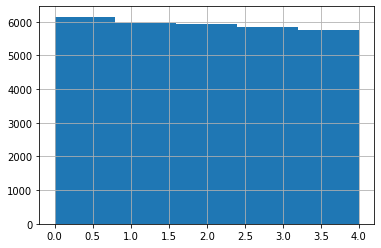

In [29]:
%%time
df_sites = df_sites[~df_sites['url'].isin(troubles_url)]
df = df[~df['url'].isin(troubles_url)]
print(df_sites.shape)
df_sites['page'].hist(bins=5)

# Чистим текст контента

замени на пробелы теги \n \t  -  а может и не надо, ПРОВЕРИТЬ<br>
Потом еще че-нить придумаю

In [30]:
%%time
def clearText(val):
    return val.replace('\t', ' ')
df['text_content'] = df['text_content'].apply(lambda x: x.replace('\t', ' ').replace('\xa0', ' '))
df.head()

Wall time: 88 ms


,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,text_content,words_count,words_count_sw
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,12,24,0,москва абакан александров альметьевск анапа ар...,1492,1136
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,12,25,10,ооо «кора-строй» завод по производству строите...,1233,1010
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,10,27,2,во всех товарах товары и услуги в каталоге ком...,1517,1340
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,8,15,5,пкф «торгтех трейд название_город» название_го...,1040,984
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,18,59,0,для бизнеса магазины помощь вход и регистрация...,1655,1484


In [31]:
df.iloc[0]['text_content']

'москва абакан александров альметьевск анапа арзамас армавир название_город название_город балаково название_город название_город название_город березники бийск благовещенск братск название_город великий новгород видное название_город владикавказ название_город название_город волгодонск волжский вологда название_город название_город название_город название_город название_город йошкар-ола название_город название_город калуга название_город название_город кострома название_город название_город курган название_город название_город люберцы название_город мытищи набережные челны нижний новгород нижний тагил нижневартовск название_город название_город одинцово название_город орёл название_город название_город название_город петрозаводск псков ростов-на-дону название_город название_город санкт-петербург саранск название_город название_город смоленск название_город название_город старый оскол стерлитамак сыктывкар тамбов название_город название_город название_город название_город название_горо

# Делаем корпуса и вектора

леммы,стемы

In [33]:
#snowball = SnowballStemmer(language="russian")


#count_tf_idf = TfidfVectorizer(stop_words=stopwords, min_df=5)


In [34]:
def get_lemm(text):
    """
    Подготив строки, токенизируем и проведем лемматизацию
    """
    #text = re.sub(r'[|#|\r|\t|\/]', ' ', text) # Заменим различные символы на пробел
    #text = re.sub(r'[|#|\r|\/]', ' ', text) # Заменим различные символы на пробел
    #text = re.sub(r'\.', ' . ', text) # Добавим пробел вокруг точек
    #text = re.sub(r'\,', ' , ', text) # Добавим пробел вокруг запятых
    word_list = nltk.word_tokenize(text)
    return ' '.join([morph.parse(w)[0].normal_form for w in word_list])

In [35]:
%%time
df['text_content'] = df['text_content'].apply(get_lemm)

#df['text_content'] = apply_parallel(df, get_lemm)

Wall time: 43min 1s


## Проставим частоты запросов

In [36]:
def getFreq(q):
    return df_ws[df_ws['q'] == q].iloc[0]['freq']

In [37]:
%%time
df_sites['freq'] = df_sites['search_query'].apply(lambda q: df_ws[df_ws['q'] == q].iloc[0]['freq'])
df_sites.head()

Wall time: 8.29 s


,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query,search_query_n,freq
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98


В запросах поменяем количество результатов на число

In [38]:
#total_q = set(map(lambda x: x.replace('\xa0', ' '), df_q['query_results_count'].to_list()))
def replaceTotalQ(val):
    val = val.replace('\xa0', ' ')
    val = re.sub('(Нашлась |Нашлось |Нашёлся | результатов)', '', val)
    val = re.sub(' тыс.', '000', val)
    val = re.sub(' млн', '000000', val)
    return int(val)
df_q['query_results_count_num'] = df_q['query_results_count'].apply(replaceTotalQ)
df_q.head()

,query_results_count,search_query,lr,freq,search_query_n,query_results_count_num
0,Нашлось 5 млн результатов,керамзитобетонные блоки в Новосибирске,65,98,керамзитобетонный блок в название_город,5000000
1,Нашлось 3 млн результатов,керамзитоблоки Новосибирск,65,23,керамзитоблок название_город,3000000
2,Нашлось 3 млн результатов,фбс Новосибирск,65,278,фбс название_город,3000000
3,Нашлось 7 млн результатов,бетон с доставкой Новосибирск,65,373,бетон с доставка название_город,7000000
4,Нашлось 4 млн результатов,керамзитобетонные блоки Новосибирск,65,98,керамзитобетонный блок название_город,4000000


Добавим это в сайты

In [39]:
def getTotalQ(q):
    return df_q[df_q['search_query'] == q].iloc[0]['query_results_count_num']

In [40]:
df_sites['query_results_count_num'] = df_sites['search_query'].apply(lambda q: df_q[df_q['search_query'] == q].iloc[0]['query_results_count_num'])
df_sites.head()

,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query,search_query_n,freq,query_results_count_num
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000


In [41]:
df_sites.head()

,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query,search_query_n,freq,query_results_count_num
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000


In [42]:
df.head()

,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,text_content,words_count,words_count_sw
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,12,24,0,москва абакан александров альметьевск анапа ар...,1492,1136
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,12,25,10,ооо « кора-строй » завод по производство строи...,1233,1010
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,10,27,2,в весь товар товар и услуга в каталог компания...,1517,1340
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,8,15,5,пкф « торгтех трейд название_город » название_...,1040,984
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,18,59,0,для бизнес магазин помощь вход и регистрация р...,1655,1484


# Добавляем фичи
- Спамность и Водность
- Плотность
- TF-IDF - для кадого запроса

## Спамность и  водность

In [43]:
%%time
#getSpamity spam< freq
df['spamity'], df['max_spam'] = zip(*df['text_content'].apply(getSpamity))
df['water_content'] = df.apply(getWaterContent, axis=1)
df.head()

Wall time: 1min 7s


,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,text_content,words_count,words_count_sw,spamity,max_spam,water_content
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,12,24,0,москва абакан александров альметьевск анапа ар...,1492,1136,0.061837,70,0.241287
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,12,25,10,ооо « кора-строй » завод по производство строи...,1233,1010,0.018812,19,0.180860
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,10,27,2,в весь товар товар и услуга в каталог компания...,1517,1340,0.030597,41,0.116678
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,8,15,5,пкф « торгтех трейд название_город » название_...,1040,984,0.052846,52,0.053846
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,18,59,0,для бизнес магазин помощь вход и регистрация р...,1655,1484,0.038540,57,0.106344


In [44]:
features_list = features_list + ['spamity', 'max_spam', 'water_content']
features_list

['len_mt',
 'len_md',
 'len_kw',
 'len_w_mt',
 'len_w_md',
 'len_w_kw',
 'words_count',
 'words_count_sw',
 'spamity',
 'max_spam',
 'water_content']

## Список запросов

In [45]:
queries_list = df_sites['search_query_n'].value_counts().index.to_list()

queries_list

['плита перекрытие название_город',
 'купить бетон название_город',
 'керамзитный блок название_город',
 'бетон с доставка название_город',
 'фбс название_город',
 'купить керамзитобетонный блок в название_город',
 'купить керамзитоблок название_город',
 'керамзитоблок название_город',
 'купить бетон с доставка название_город',
 'керамзитобетонный блок название_город',
 'керамзитобетонный блок в название_город',
 'купить фбс название_город',
 'купить плита перекрытие название_город']

## Плотность запросов

In [46]:
%%time
# Количество вхождений (плотность запроса): по словам отдельно и общая
def getDensityApply(val, qu, replace_city=True):
    txt = val.lower()
    qu = qu.lower()
    if replace_city:
        # обрезаем вхождение города
        city_name = replace_city_name
        qu = qu.replace(' в ' + city_name, '')
        qu = qu.replace(' ' + city_name, '')
    # разбиваем текст
    word_list = [w for w in tokenizer.tokenize(txt) if not w in all_stopwords]
    word_cnt = len(word_list)
    #print(word_list)
    #lemms = [morph.parse(w)[0].normal_form for w in word_list]
    qu_arr = np.array([])
    # каждое слово в запросе считаем отдельно
    for q in qu.split():
        qu_arr = np.append(qu_arr, len(re.findall(rf'{q}', txt)))
    cnt_qu = qu_arr.mean()
    #return cnt_qu/word_cnt, len(re.findall(rf'{qu}', txt))/word_cnt
    return cnt_qu/word_cnt

for q in queries_list:
    #df[q+'_density'], df[q+'_density_full'] = zip(*df['text_content'].apply(getDensityApply, args=(q,)))
    df[q+'_density'] = df['text_content'].apply(getDensityApply, args=(q,)) 


Wall time: 1min 34s


In [47]:
df.head()

,url,domain,content,size_content,meta_title,meta_descr,meta_kw,len_mt,len_md,len_kw,...,бетон с доставка название_город_density,фбс название_город_density,купить керамзитобетонный блок в название_город_density,купить керамзитоблок название_город_density,керамзитоблок название_город_density,купить бетон с доставка название_город_density,керамзитобетонный блок название_город_density,керамзитобетонный блок в название_город_density,купить фбс название_город_density,купить плита перекрытие название_город_density
0,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,novosibirsk.berfi.ru,"<html dir=""ltr"" lang=""ru""><head><meta charset=...",80873,купить керамзитобетонный блок в название_город...,купить керамзитобетонный блок в название_город...,,88,137,0,...,0.103062,0.000000,0.045053,0.009717,0.000883,0.081935,0.058304,0.058304,0.009276,0.006184
1,http://www.kora-trading.ru/novosibirsk/keramzi...,www.kora-trading.ru,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",38588,керамзитобетонный блок в название_город - прои...,керамзитобетонный строительный и облицовочный ...,"керамзитобетонный , блок , полнотелый , размер...",84,171,97,...,0.129043,0.000000,0.011881,0.001485,0.000000,0.097525,0.016337,0.016337,0.001485,0.000990
2,https://nsk.pulscen.ru/price/100303-bloki-stro...,nsk.pulscen.ru,"<html class="""" lang=""ru""><head><script async=""...",460974,керамзитобетонный блок в название_город - срав...,широкий выбор керамзитный блок весь вид и разм...,"блок строительный керамзитобетонный , блок стр...",72,155,90,...,0.103731,0.000000,0.011194,0.007090,0.012687,0.078172,0.016045,0.016045,0.000746,0.000498
3,http://penoblok-gazobeton.ru/novosibirsk/keram...,penoblok-gazobeton.ru,"<html lang=""ru"" class="" desktop landscape""><he...",42646,"керамзитобетонный блок название_город , продаж...","пкф торгтех трейд название_город , купить блок...","керамзитобетонный блок , керамзитобетон , кера...",73,108,83,...,0.080623,0.000000,0.030827,0.002033,0.004065,0.060467,0.046240,0.046240,0.000000,0.000000
4,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,www.avito.ru,"<html><head> <script type=""text/javascript"" as...",1043072,керамзитобетонный блок - авить : недвижимость ...,на авить вы мочь недорого купить или выгодно п...,,112,342,0,...,0.109759,0.001352,0.013748,0.001690,0.002705,0.082488,0.020284,0.020284,0.001014,0.000451


In [48]:
df.describe()

,size_content,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,words_count,words_count_sw,spamity,...,бетон с доставка название_город_density,фбс название_город_density,купить керамзитобетонный блок в название_город_density,купить керамзитоблок название_город_density,керамзитоблок название_город_density,купить бетон с доставка название_город_density,керамзитобетонный блок название_город_density,керамзитобетонный блок в название_город_density,купить фбс название_город_density,купить плита перекрытие название_город_density
count,1.224900e+04,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,...,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000,12249.000000
mean,2.710448e+05,76.471875,149.878112,75.160585,11.797943,24.465181,3.657360,1637.038942,1430.914442,0.057370,...,0.106882,0.008392,0.011746,0.003444,0.001800,0.081434,0.015075,0.015075,0.006740,0.007723
std,2.825136e+05,28.598368,127.207238,305.773301,4.740876,20.945872,11.427665,1476.329091,1363.374651,0.023571,...,0.033193,0.017418,0.013569,0.006131,0.006820,0.024770,0.019349,0.019349,0.010049,0.012231
min,6.349000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,300.000000,215.000000,0.007262,...,0.000964,0.000000,0.000000,0.000000,0.000000,0.000723,0.000000,0.000000,0.000000,0.000000
25%,8.624900e+04,59.000000,103.000000,0.000000,9.000000,16.000000,0.000000,761.000000,649.000000,0.040742,...,0.085360,0.000000,0.001368,0.000111,0.000000,0.065447,0.000661,0.000661,0.000463,0.000702
50%,1.850680e+05,74.000000,142.000000,23.000000,11.000000,23.000000,1.000000,1291.000000,1126.000000,0.054772,...,0.106827,0.000000,0.006416,0.000925,0.000000,0.081522,0.005506,0.005506,0.001830,0.002380
75%,3.498510e+05,93.000000,185.000000,108.000000,15.000000,31.000000,5.000000,1932.000000,1662.000000,0.068560,...,0.128485,0.004756,0.018265,0.003401,0.000000,0.097336,0.025157,0.025157,0.009779,0.008728
max,3.862478e+06,534.000000,6313.000000,23644.000000,82.000000,1057.000000,1002.000000,59558.000000,59310.000000,0.293781,...,0.245407,0.129231,0.091026,0.055070,0.079208,0.185039,0.134553,0.134553,0.071724,0.083184


## Устанавливаем правильные позиции

In [49]:
df_sites.head()

,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query,search_query_n,freq,query_results_count_num
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000


In [50]:
df_sites[df_sites['page'] == 0].describe()

,page,real_pos,pos,is_reklama,is_ya_url,freq,query_results_count_num
count,6151.0,6151.000000,6151.000000,6151.0,6151.0,6151.000000,6.151000e+03
mean,0.0,4.536173,4.953829,0.0,0.0,96.013331,6.825310e+06
std,0.0,2.888995,3.113644,0.0,0.0,141.040170,4.470148e+06
min,0.0,0.000000,0.000000,0.0,0.0,0.000000,9.000000e+03
25%,0.0,2.000000,2.000000,0.0,0.0,12.000000,3.000000e+06
50%,0.0,5.000000,5.000000,0.0,0.0,45.000000,6.000000e+06
75%,0.0,7.000000,7.000000,0.0,0.0,119.000000,1.000000e+07
max,0.0,14.000000,15.000000,0.0,0.0,1096.000000,1.900000e+07


Для каждого запроса определим максимальное количество ссылок на первой странице

In [52]:
qu_p0 = {}
for qu in queries_list:
    qu_p0[qu] = {
        'real_position_max': df_sites[(df_sites['page'] == 0) & (df_sites['search_query_n'] == qu)]['real_pos'].max(),
        'position_max': df_sites[(df_sites['page'] == 0) & (df_sites['search_query_n'] == qu)]['pos'].max(),
    }
qu_p0

{'плита перекрытие название_город': {'real_position_max': 10.0,
  'position_max': 13.0},
 'купить бетон название_город': {'real_position_max': 10.0,
  'position_max': 12.0},
 'керамзитный блок название_город': {'real_position_max': 10.0,
  'position_max': 12.0},
 'бетон с доставка название_город': {'real_position_max': 10.0,
  'position_max': 12.0},
 'фбс название_город': {'real_position_max': 14.0, 'position_max': 15.0},
 'купить керамзитобетонный блок в название_город': {'real_position_max': 14.0,
  'position_max': 15.0},
 'купить керамзитоблок название_город': {'real_position_max': 10.0,
  'position_max': 11.0},
 'керамзитоблок название_город': {'real_position_max': 9.0,
  'position_max': 12.0},
 'купить бетон с доставка название_город': {'real_position_max': 9.0,
  'position_max': 12.0},
 'керамзитобетонный блок название_город': {'real_position_max': 9.0,
  'position_max': 12.0},
 'керамзитобетонный блок в название_город': {'real_position_max': 10.0,
  'position_max': 14.0},
 'купи

In [53]:
def setPosition(row, qu_p0):
    q = row['search_query_n']
    # отступы для первой страницы
    pos_offset = 0
    real_pos_offset = 0
    page_offset = 0
    if row['page'] > 0:
        page_offset = row['page'] - 1
        pos_offset = qu_p0[q]['position_max']
        real_pos_offset = qu_p0[q]['real_position_max']
        
    pos = page_offset * 10 + pos_offset + row['pos']
    real_pos = page_offset * 10 + real_pos_offset + row['real_pos']
    
    # проверяем: первая или не первая страница
    isFirstPage = 1 if row['page'] == 0 else 0 
    return pos, real_pos, isFirstPage

In [54]:
%%time
df_sites['pos'], df_sites['real_pos'], df_sites['is_first_page'] = zip(*df_sites.apply(setPosition, axis=1, args=(qu_p0,)))
df_sites.head()

Wall time: 508 ms


,link_text,url,page,real_pos,pos,is_reklama,is_ya_url,search_query,search_query_n,freq,query_results_count_num,is_first_page
0,Купить керамзитобетонные блоки в Новосибирске....,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,0,0.0,0.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000,1
1,Керамзитобетонные блоки в Новосибирске...\nkor...,http://www.kora-trading.ru/novosibirsk/keramzi...,0,1.0,1.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000,1
2,Керамзитобетонные блоки в Новосибирске - сравн...,https://nsk.pulscen.ru/price/100303-bloki-stro...,0,2.0,2.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000,1
3,"Керамзитобетонные блоки Новосибирск, продажа.....",http://penoblok-gazobeton.ru/novosibirsk/keram...,0,3.0,3.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000,1
4,керамзитобетонные блоки - Авито: недвижимость....,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,0,4.0,4.0,0,0,керамзитобетонные блоки в Новосибирске,керамзитобетонный блок в название_город,98,5000000,1


# TF-IDF
- tf: Посчитаем для каждого урла (уже посчитано - это плотность)
- idf: Посчитаем для каждого запроса
- tf-df

## idf

Посчитаем количество страниц по запросам, Посчитаем количество страниц по запросам с вхождением этих запросов

In [55]:
url_for_q = {}
for qu in queries_list:
    url_for_q[qu] =  df_sites[df_sites['search_query_n'] == qu]['url'].to_list()

In [56]:
qu_idf = {}
for qu in queries_list:
    q = [w for w in tokenizer.tokenize(qu) if not w in all_stopwords]
    # считаем вхождение ключевых слов
    cnt_doc_part = np.array([])
    for q_w in q:
        cnt_doc_part = np.append(cnt_doc_part, df[df['url'].isin(url_for_q[qu])]['text_content'].apply(lambda x: q_w in x).sum()) 
    
    all_docs = df_sites[df_sites['search_query_n'] == qu].shape[0] # всего документов
    part_in = cnt_doc_part.mean()  # берем среднее значение вхождений
    #'cnt_doc_full':df['text_content'].apply(lambda x: qu in x).sum()    
    qu_idf[qu] = part_in / all_docs
qu_idf

{'плита перекрытие название_город': 0.6706569759156334,
 'купить бетон название_город': 0.8811668811668811,
 'керамзитный блок название_город': 0.6821972965199885,
 'бетон с доставка название_город': 0.9340034965034965,
 'фбс название_город': 0.7105032822757111,
 'купить керамзитобетонный блок в название_город': 0.7547087166009636,
 'купить керамзитоблок название_город': 0.6649053280493175,
 'керамзитоблок название_город': 0.6335978835978836,
 'купить бетон с доставка название_город': 0.8820609002647838,
 'керамзитобетонный блок название_город': 0.7878386336866903,
 'керамзитобетонный блок в название_город': 0.8161276030128489,
 'купить фбс название_город': 0.7088156723063224,
 'купить плита перекрытие название_город': 0.6810768543342269}

# Собираем финальные ДатаФреймы

- Данные по запросам
- Данные по контенту
- Данные по позициям и номерам страниц

## Данные по запросам
- search_query_n (для сопоставления с другими датафреймами)
- query_results_count_num

In [57]:
df_q.head()

,query_results_count,search_query,lr,freq,search_query_n,query_results_count_num
0,Нашлось 5 млн результатов,керамзитобетонные блоки в Новосибирске,65,98,керамзитобетонный блок в название_город,5000000
1,Нашлось 3 млн результатов,керамзитоблоки Новосибирск,65,23,керамзитоблок название_город,3000000
2,Нашлось 3 млн результатов,фбс Новосибирск,65,278,фбс название_город,3000000
3,Нашлось 7 млн результатов,бетон с доставкой Новосибирск,65,373,бетон с доставка название_город,7000000
4,Нашлось 4 млн результатов,керамзитобетонные блоки Новосибирск,65,98,керамзитобетонный блок название_город,4000000


## Данные по контенту
- url (для сопоставления с другими датафреймами)
- все числовые данные

## Проверим: нет ли запросов с нулевой плотностью

In [58]:
for qu in queries_list:
    print(df[qu+'_density'].describe())

count    12249.000000
mean         0.009040
std          0.017814
min          0.000000
25%          0.000000
50%          0.001007
75%          0.006619
max          0.124776
Name: плита перекрытие название_город_density, dtype: float64
count    12249.000000
mean         0.017999
std          0.014909
min          0.000000
25%          0.006510
50%          0.014271
75%          0.025223
max          0.106275
Name: купить бетон название_город_density, dtype: float64
count    12249.000000
mean         0.012666
std          0.015615
min          0.000000
25%          0.000632
50%          0.005286
75%          0.021957
max          0.112100
Name: керамзитный блок название_город_density, dtype: float64
count    12249.000000
mean         0.106882
std          0.033193
min          0.000964
25%          0.085360
50%          0.106827
75%          0.128485
max          0.245407
Name: бетон с доставка название_город_density, dtype: float64
count    12249.000000
mean         0.008392
std     

## Собираем

In [62]:
df_sites['domain'] = df_sites['url'].apply(getDomain)

## df_sites - главный ДатаФрейм с целевыми фичами

In [63]:
df_sites = df_sites[['domain', 'url', 'freq', 'query_results_count_num', 'pos', 'real_pos', 'is_first_page', 'page', 'search_query_n']]
df_sites.head()

,domain,url,freq,query_results_count_num,pos,real_pos,is_first_page,page,search_query_n
0,novosibirsk.berfi.ru,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,98,5000000,0.0,0.0,1,0,керамзитобетонный блок в название_город
1,www.kora-trading.ru,http://www.kora-trading.ru/novosibirsk/keramzi...,98,5000000,1.0,1.0,1,0,керамзитобетонный блок в название_город
2,nsk.pulscen.ru,https://nsk.pulscen.ru/price/100303-bloki-stro...,98,5000000,2.0,2.0,1,0,керамзитобетонный блок в название_город
3,penoblok-gazobeton.ru,http://penoblok-gazobeton.ru/novosibirsk/keram...,98,5000000,3.0,3.0,1,0,керамзитобетонный блок в название_город
4,www.avito.ru,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,98,5000000,4.0,4.0,1,0,керамзитобетонный блок в название_город


Собираем данные из df

In [64]:
%%time
def getFromDF(url, val):
    return df[df['url'] == url][val].values[0]
for ft in features_list:
    df_sites[ft] = df_sites['url'].apply(getFromDF, args=(ft,))
df_sites.head()

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 4min 15s


,domain,url,freq,query_results_count_num,pos,real_pos,is_first_page,page,search_query_n,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,words_count,words_count_sw,spamity,max_spam,water_content
0,novosibirsk.berfi.ru,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,98,5000000,0.0,0.0,1,0,керамзитобетонный блок в название_город,88,137,0,12,24,0,1492,1136,0.061837,70,0.241287
1,www.kora-trading.ru,http://www.kora-trading.ru/novosibirsk/keramzi...,98,5000000,1.0,1.0,1,0,керамзитобетонный блок в название_город,84,171,97,12,25,10,1233,1010,0.018812,19,0.180860
2,nsk.pulscen.ru,https://nsk.pulscen.ru/price/100303-bloki-stro...,98,5000000,2.0,2.0,1,0,керамзитобетонный блок в название_город,72,155,90,10,27,2,1517,1340,0.030597,41,0.116678
3,penoblok-gazobeton.ru,http://penoblok-gazobeton.ru/novosibirsk/keram...,98,5000000,3.0,3.0,1,0,керамзитобетонный блок в название_город,73,108,83,8,15,5,1040,984,0.052846,52,0.053846
4,www.avito.ru,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,98,5000000,4.0,4.0,1,0,керамзитобетонный блок в название_город,112,342,0,18,59,0,1655,1484,0.038540,57,0.106344


## Собираем tf-idf

In [65]:
#qu_idf
def getTFIDF(row):
    url = row['url']
    q = row['search_query_n']
    tf = df[df['url'] == url][q+'_density'].values[0]
    idf = qu_idf[q]
    return tf/idf, tf


df_sites['tf_idf'], df_sites['density'] = zip(*df_sites.apply(getTFIDF, axis=1))
df_sites.head()

,domain,url,freq,query_results_count_num,pos,real_pos,is_first_page,page,search_query_n,len_mt,...,len_w_mt,len_w_md,len_w_kw,words_count,words_count_sw,spamity,max_spam,water_content,tf_idf,density
0,novosibirsk.berfi.ru,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,98,5000000,0.0,0.0,1,0,керамзитобетонный блок в название_город,88,...,12,24,0,1492,1136,0.061837,70,0.241287,0.071440,0.058304
1,www.kora-trading.ru,http://www.kora-trading.ru/novosibirsk/keramzi...,98,5000000,1.0,1.0,1,0,керамзитобетонный блок в название_город,84,...,12,25,10,1233,1010,0.018812,19,0.180860,0.020017,0.016337
2,nsk.pulscen.ru,https://nsk.pulscen.ru/price/100303-bloki-stro...,98,5000000,2.0,2.0,1,0,керамзитобетонный блок в название_город,72,...,10,27,2,1517,1340,0.030597,41,0.116678,0.019660,0.016045
3,penoblok-gazobeton.ru,http://penoblok-gazobeton.ru/novosibirsk/keram...,98,5000000,3.0,3.0,1,0,керамзитобетонный блок в название_город,73,...,8,15,5,1040,984,0.052846,52,0.053846,0.056658,0.046240
4,www.avito.ru,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,98,5000000,4.0,4.0,1,0,керамзитобетонный блок в название_город,112,...,18,59,0,1655,1484,0.038540,57,0.106344,0.024854,0.020284


In [66]:
df_sites.describe()

,freq,query_results_count_num,pos,real_pos,is_first_page,page,len_mt,len_md,len_kw,len_w_mt,len_w_md,len_w_kw,words_count,words_count_sw,spamity,max_spam,water_content,tf_idf,density
count,29654.000000,2.965400e+04,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000
mean,96.174310,6.835375e+06,26.550449,44.419134,0.207426,1.968605,78.133270,150.903689,76.511196,11.850037,24.398530,3.669050,1573.675693,1367.305524,0.056093,76.759661,0.140541,0.030121,0.025228
std,140.926142,4.474335e+06,15.190493,28.690454,0.405470,1.415426,29.542268,120.074780,277.484193,4.895206,19.514104,9.373815,1307.519632,1193.698592,0.022951,88.179597,0.050778,0.040456,0.036196
min,0.000000,9.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,300.000000,215.000000,0.007262,5.000000,0.001049,0.000000,0.000000
25%,13.000000,3.000000e+06,14.000000,22.000000,0.000000,1.000000,60.000000,104.000000,0.000000,9.000000,16.000000,0.000000,771.000000,654.000000,0.040214,33.000000,0.109052,0.000929,0.000658
50%,46.000000,6.000000e+06,27.000000,45.000000,0.000000,2.000000,75.000000,144.000000,25.000000,11.000000,23.000000,1.000000,1310.000000,1124.000000,0.053571,55.000000,0.136790,0.010483,0.007769
75%,119.000000,1.000000e+07,40.000000,67.000000,0.000000,3.000000,95.000000,187.000000,108.000000,15.000000,31.000000,5.000000,1839.000000,1579.000000,0.066883,91.000000,0.176678,0.045690,0.034401
max,1096.000000,1.900000e+07,55.000000,93.000000,1.000000,4.000000,534.000000,6313.000000,23644.000000,82.000000,1057.000000,1002.000000,59558.000000,59310.000000,0.293781,4483.000000,0.345811,0.227110,0.212121


In [67]:
df_sites[['spamity', 'max_spam', 'water_content', 'tf_idf', 'density']].describe()

,spamity,max_spam,water_content,tf_idf,density
count,29654.000000,29654.000000,29654.000000,29654.000000,29654.000000
mean,0.056093,76.759661,0.140541,0.030121,0.025228
std,0.022951,88.179597,0.050778,0.040456,0.036196
min,0.007262,5.000000,0.001049,0.000000,0.000000
25%,0.040214,33.000000,0.109052,0.000929,0.000658
50%,0.053571,55.000000,0.136790,0.010483,0.007769
75%,0.066883,91.000000,0.176678,0.045690,0.034401
max,0.293781,4483.000000,0.345811,0.227110,0.212121


In [68]:
print('Количество страниц с нулевым tf-idf:', df_sites[df_sites['tf_idf']==0].shape[0])

Количество страниц с нулевым tf-idf: 5597


Удалим нулевые

In [69]:
df_sites = df_sites[df_sites['tf_idf'] != 0]
print(df_sites.shape[0])
df_sites.head()

24057


,domain,url,freq,query_results_count_num,pos,real_pos,is_first_page,page,search_query_n,len_mt,...,len_w_mt,len_w_md,len_w_kw,words_count,words_count_sw,spamity,max_spam,water_content,tf_idf,density
0,novosibirsk.berfi.ru,http://novosibirsk.berfi.ru/kirpich-bloki/stro...,98,5000000,0.0,0.0,1,0,керамзитобетонный блок в название_город,88,...,12,24,0,1492,1136,0.061837,70,0.241287,0.071440,0.058304
1,www.kora-trading.ru,http://www.kora-trading.ru/novosibirsk/keramzi...,98,5000000,1.0,1.0,1,0,керамзитобетонный блок в название_город,84,...,12,25,10,1233,1010,0.018812,19,0.180860,0.020017,0.016337
2,nsk.pulscen.ru,https://nsk.pulscen.ru/price/100303-bloki-stro...,98,5000000,2.0,2.0,1,0,керамзитобетонный блок в название_город,72,...,10,27,2,1517,1340,0.030597,41,0.116678,0.019660,0.016045
3,penoblok-gazobeton.ru,http://penoblok-gazobeton.ru/novosibirsk/keram...,98,5000000,3.0,3.0,1,0,керамзитобетонный блок в название_город,73,...,8,15,5,1040,984,0.052846,52,0.053846,0.056658,0.046240
4,www.avito.ru,https://www.avito.ru/novosibirsk?q=%D0%BA%D0%B...,98,5000000,4.0,4.0,1,0,керамзитобетонный блок в название_город,112,...,18,59,0,1655,1484,0.038540,57,0.106344,0.024854,0.020284


# Сохраним данные для обучения

In [75]:
%%time
df_sites.to_csv('df_to_model_source.csv', sep=';', index=False)

Wall time: 290 ms


In [76]:
df.to_csv('df_text_lemma.csv', sep=';', index=False)

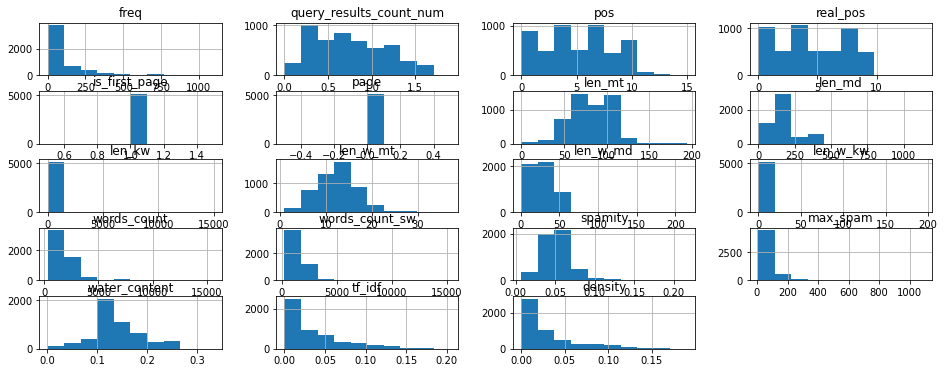

In [72]:
_ = df_sites[df_sites['page'] == 0].hist(figsize=(16, 6))


In [ ]:
['len_mt', 'len_md', 'spamity', 'len_kw', 'len_w_mt', 'len_w_md', 'len_w_kw', 'water_content', 'tf_idf', 'density']

In [ ]:
"""
feat_cols - ['freq', 'query_results_count_num', 'len_mt', 'len_md', 'len_kw', 'len_w_mt', 'len_w_md', 'len_w_kw', 'words_count', 'words_count_sw', 'spamity', 'max_spam', 'water_content', 'tf_idf', 'density']
target_cols - ['pos', 'real_pos', 'page', 'is_first_page']
"""


In [18]:
qu_idf = {'плита перекрытие название_город': 0.6706569759156334,
 'купить бетон название_город': 0.8811668811668811,
 'керамзитный блок название_город': 0.6821972965199885,
 'бетон с доставка название_город': 0.9340034965034965,
 'фбс название_город': 0.7105032822757111,
 'купить керамзитобетонный блок в название_город': 0.7547087166009636,
 'купить керамзитоблок название_город': 0.6649053280493175,
 'керамзитоблок название_город': 0.6335978835978836,
 'купить бетон с доставка название_город': 0.8820609002647838,
 'керамзитобетонный блок название_город': 0.7878386336866903,
 'керамзитобетонный блок в название_город': 0.8161276030128489,
 'купить фбс название_город': 0.7088156723063224,
 'купить плита перекрытие название_город': 0.6810768543342269}

a_file = open("qu_idf.pkl", "wb")
pickle.dump(qu_idf, a_file)
a_file.close()